# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

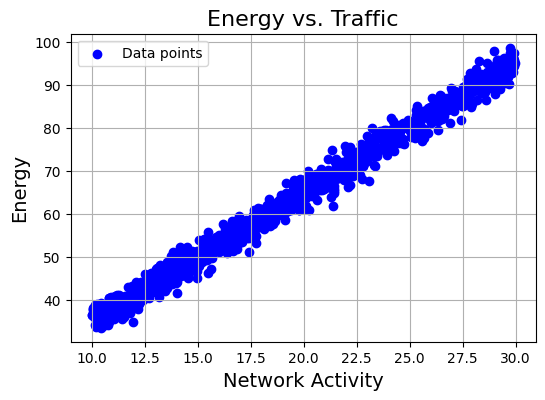

In [6]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [7]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

y_range = lr.predict(data['Net_Activity'])

print(y_range)

[35.01427093 35.07430142 35.13433191 35.19436239 35.25439288 35.31442337
 35.37445386 35.43448434 35.49451483 35.55454532 35.61457581 35.67460629
 35.73463678 35.79466727 35.85469776 35.91472824 35.97475873 36.03478922
 36.09481971 36.15485019 36.21488068 36.27491117 36.33494165 36.39497214
 36.45500263 36.51503312 36.5750636  36.63509409 36.69512458 36.75515507
 36.81518555 36.87521604 36.93524653 36.99527702 37.0553075  37.11533799
 37.17536848 37.23539897 37.29542945 37.35545994 37.41549043 37.47552092
 37.5355514  37.59558189 37.65561238 37.71564287 37.77567335 37.83570384
 37.89573433 37.95576481 38.0157953  38.07582579 38.13585628 38.19588676
 38.25591725 38.31594774 38.37597823 38.43600871 38.4960392  38.55606969
 38.61610018 38.67613066 38.73616115 38.79619164 38.85622213 38.91625261
 38.9762831  39.03631359 39.09634408 39.15637456 39.21640505 39.27643554
 39.33646603 39.39649651 39.456527   39.51655749 39.57658798 39.63661846
 39.69664895 39.75667944 39.81670992 39.87674041 39

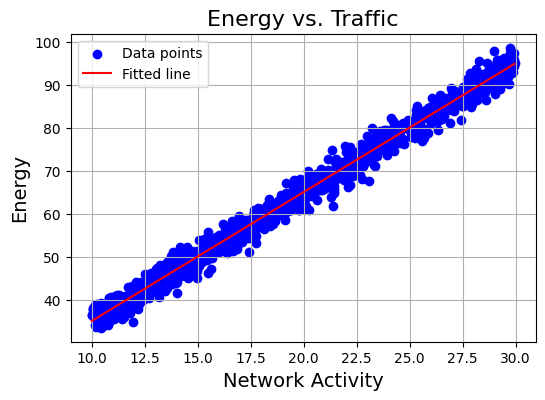

Weight: 59.97045693033952
Bias: 35.01427093150569
X.min(): 10.003399904397227
X.max(): 29.95146341578984
Normalized Equation:
y = (59.97045693033952 * (x - 10.003399904397227)) / (29.95146341578984 - 10.003399904397227) + 35.01427093150569
Equation in mx + c Form:
y = 3.0063297570758976x + 4.940752126986119


In [8]:
#Visualisering av prediksjonskurven

X = data['Net_Activity']
m, _ = X.to_frame().shape

x_range = np.linspace(X.min(), X.max(), m)
 
# Samme kode som grafen gitt
plt.figure(figsize=(6, 4))
plt.grid(True)
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)

# Plott vår linje på samme graf
plt.plot(x_range, y_range, c='red', label='Fitted line')
plt.legend()
plt.show()

#Formel
lr.print_equation(X)

0      63.720665
1      26.789872
2      57.846761
3       2.617796
4      61.112610
         ...    
995   -58.433072
996   -43.757093
997    -7.790609
998   -33.860046
999   -50.714919
Name: Energy, Length: 1000, dtype: float64


Text(0.5, 1.0, 'Prediction error distribution')

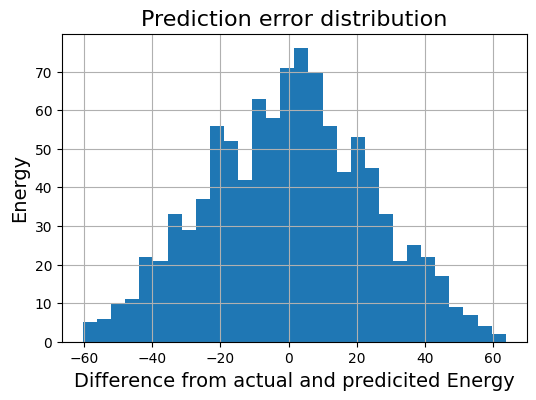

In [9]:
errors = data['Energy']- y_range
 
print(errors)

plt.figure(figsize=(6, 4))
plt.grid(True)
plt.hist(errors, bins=30)
plt.xlabel('Difference from actual and predicited Energy', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Prediction error distribution', fontsize=16)


The prediction error distribution is normally distributed. This means that our prediction fits well, as almost equal number of points in our prediciton under and overestimate, while the underlying trends in the data has low prediciton error. This further indicates that the model errors are likely due to noise rather than systematic errors in our prediction, as most points in our prediction have low error, while only few outliers have larger errors indicated by the bell-shaped curve of the historgram above. 


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

   d. Plot the ROC curve

---

In [10]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

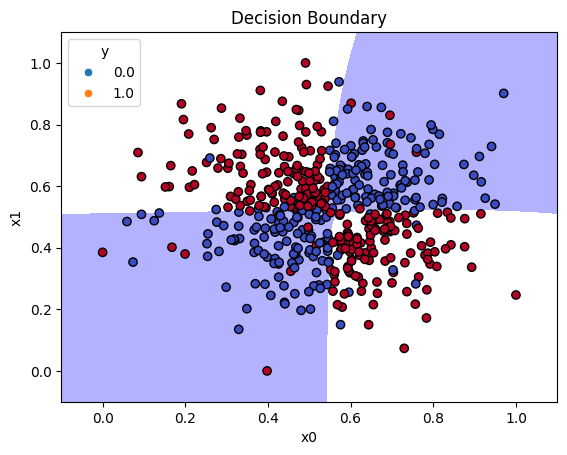

Accuracy: 0.916


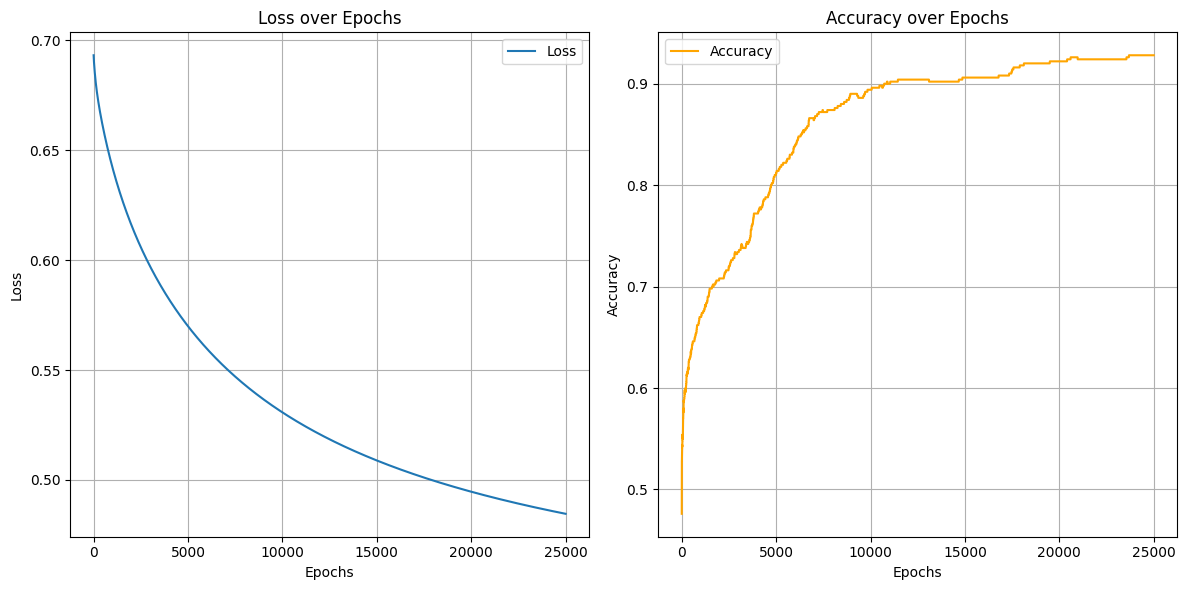

In [11]:
from logistic_regression import LogisticRegression

lgr = LogisticRegression(0.1, 25000, threshold=0.5, degree=12)
features = ["x0", "x1", "y"]
min_max_scalar = skl.MinMaxScaler()

preprocessed_train = pd.DataFrame(
    min_max_scalar.fit_transform(train[features]), 
    columns=features
)

preprocessed_test = pd.DataFrame(
    min_max_scalar.transform(test[features]), 
    columns=features
)

def plot():
    sns.scatterplot(x='x0', y='x1', hue="y", data=preprocessed_train)
    plt.title("Training Data")

    # Create a mesh grid for plotting decision boundary
    x0_range = np.linspace(preprocessed_train['x0'].min() - 0.1, preprocessed_train['x0'].max() + 0.1, 500)
    x1_range = np.linspace(preprocessed_train['x1'].min() - 0.1, preprocessed_train['x1'].max() + 0.1, 500)
    x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)

    # Flatten the grid to pass it to the model
    grid_points = np.c_[x0_grid.ravel(), x1_grid.ravel()]
    grid_poly = lgr.poly.transform(grid_points)  # Transform grid points to polynomial features

    # Predict on the grid
    decision_boundary_probs = lgr.sigmoid_function(np.dot(grid_poly, lgr.weights) + lgr.bias)
    decision_boundary = decision_boundary_probs.reshape(x0_grid.shape)

    # Plot decision boundary
    plt.contourf(x0_grid, x1_grid, decision_boundary, levels=[0, 0.5], colors=['blue', 'red'], alpha=0.3)
    plt.scatter(preprocessed_train['x0'], preprocessed_train['x1'], c=preprocessed_train['y'], edgecolor='k', cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()

lgr.fit(preprocessed_train)
predictions = lgr.predict(preprocessed_test)
accuracy = lgr.accuracy(predictions, test[["y"]])

plot()
print("Accuracy:", accuracy)
lgr.plot_metrics()

3) a. 

The poor initial performance was due to the data being so evenly split into four quadrants (1s and 0s against x0 and x1 in the graph above). This made standard linear regression impossible and resulted in a maximum accuracy of around 50%, which makes sense when trying to draw a linear line on the scatter plot of the data (around half will always be on the wrong side of the split regardless). In order to work around this, i engineered polynomial weights for the features in order to catch the more complicated relationship between x0, x1, 1, and 0. This allowed the model to caputure the non-linear relationship.

3) b.

The model uses a 0.5 and up decision boundry to predict if the value is 0 or 1. This is a bias and may not capture the full relationship. Furthermore, we assume a perfect sigmoid decision boundry with no additional modifications which may result in inaccurate relationships between x0, x1, 0, and 1 to be drawn.

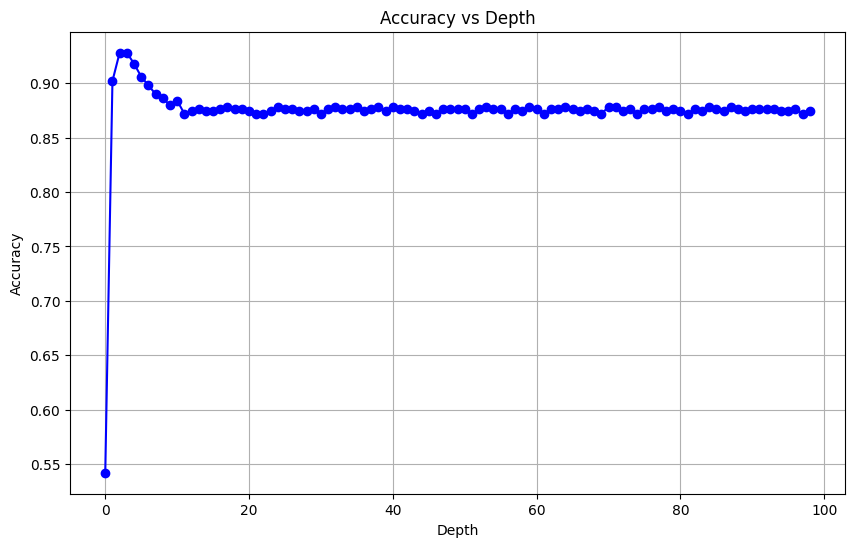

In [12]:
# 3) c.

accuracies = []

depths = list(range(1, 100))

for i in depths:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(train[["x0", "x1"]], train["y"])

    y_pred = dt.predict(test[["x0", "x1"]])

    accuracy = accuracy_score(test["y"], y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', color='b')
plt.title('Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Clearly a decision tree is capable of solving this problem. It maxes out its accuracy at around a depth of 2 (95% ish), then it falls to around 87% after that. I believe decision trees work well for this task as they do not assume any correlation between the data (x0 and x1 in this case), and can therefore find relationships between the data that do not involve any linearity. As the data is not linearily seperable, this proves useful for this specific task.

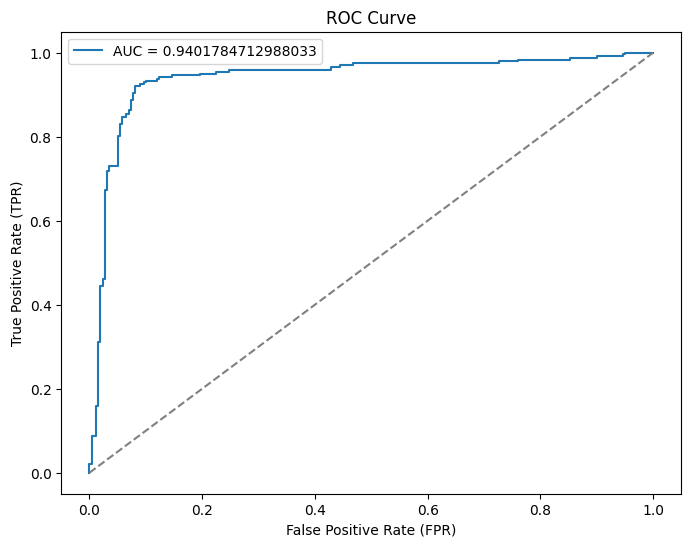

In [13]:
# 3. d.

y_pred_prob = lgr.roc_predict(preprocessed_test[["x0", "x1"]])

fpr, tpr, _ = roc_curve(preprocessed_test["y"], y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(preprocessed_test['y'], y_pred_prob)}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [14]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [15]:
# sns.pairplot(train, hue="target", vars=['data_stream_' + str(i) for i in range(11)], diag_kind="kde")
# plt.show()

Based on the plot, column 3 seems to be different than the rest of the columns when plottet against one another. It is not clear what this means, but the pattern may mean that the columnn is the "20% critial communication"

In [16]:
# Find best hyperparameters

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

anomoly_columns = [3]

for column in anomoly_columns:
    train['data_stream_' + str(column)] = (train['data_stream_' + str(column)] * 1000) % 2 
    test['data_stream_' + str(column)] = (test['data_stream_' + str(column)] * 1000) % 2 

features = ['data_stream_' + str(i) for i in range(11)]
X = train[features]
y = train["target"]

param_grid = {
    'max_depth': [i for i in range(6, 8)] + [None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [i for i in range(2, 10)],
    'min_samples_leaf': [i for i in range(1, 10)],
    'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier(random_state=41)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=make_scorer(roc_auc_score),
    cv=5,
    verbose=2,
    n_jobs=-1  
)

# grid_search.fit(X, y)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Hyperparameters:")
# print(best_params)
# print("Best AUC Score (Cross-Validation):", best_score)

Accuracy: 0.607


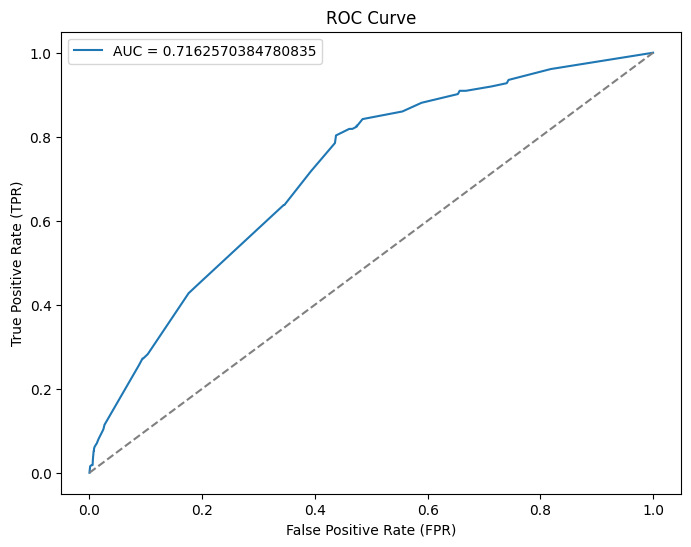

In [17]:

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Preprocessing
anomoly_columns = [3]

for column in anomoly_columns:
    train['data_stream_' + str(column)] = (train['data_stream_' + str(column)] * 1000) % 2 
    test['data_stream_' + str(column)] = (test['data_stream_' + str(column)] * 1000) % 2 

features = ['data_stream_' + str(i) for i in range(11)] + ["target"]

# Training
train_data = train[['data_stream_' + str(i) for i in range(11)]]
train_target = train["target"]

dt = DecisionTreeClassifier(
    max_depth=7,
    criterion='entropy',
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=43,
    )

dt.fit(train_data, train_target)

# Testing
test_data = test[['data_stream_' + str(i) for i in range(11)]]
test_target = test["target"]

# Plotting and stuff
y_pred = dt.predict(test_data)

y_pred_prob = dt.predict_proba(test_data)[:, 1]

accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

fpr, tpr, _ = roc_curve(test_target, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(test_target, y_pred_prob)}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

2. a) The threshold breaking strategy is quite different from the default parameters in the decision tree. Many of the hyperparameters have been tweaked in order to better suit the dataset. The max depth was set to 7 to avoid overfitting, entropy because it led to a better AUC, min_split and min_leaf set to 5 and 3 in order to reduce overfitting (and by trial and error), and balanced as this improves AUC slightly. These were all tweaked through trial and error in addition to the helping function above which determines optimal parameters (grid search).

2. b) ROC stands for Receiver Operating Characteristic curve and AUC for Area Under the Curve. These two metrics are commonly used to evaluate machine learning models. They plot TPR (True Positive Rate) against FPR (False Positive Rate) across different thresholds. The AUC is the area between the ROC curve and a basic y=x (dotted line) which simulates randomly guessing. The reasons this measure is so widely used is because it balances the errors of false positives and false negatives. The measure also takes into account different thresholds, meaning that it provides more information than a simple accuracy measure and deeper insights into how the model actually performs under different circumstances. The graph is plotted above. A AUC of 0.7163 (0.72) is decent, but it is clear that this model only performs slightly better than random guessing. We can see that there is only a slight convex parabolic relationship between TPR and FPR, which indicates that the model is performing intelligent decisions, but not extremely well. For the various thresholds, the model has a higher TPR than FPR, but only marginally. This explaines the low accuracy score of 0.6.

Accuracy: 0.6135


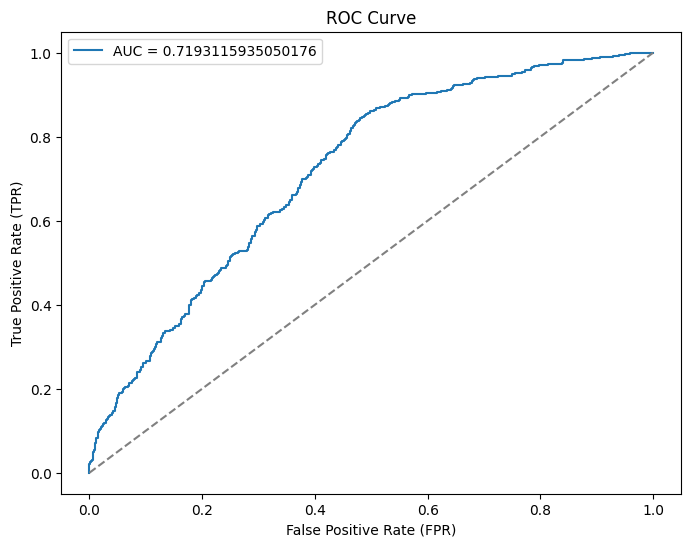

In [18]:

# 3. c)

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Preprocessing
anomoly_columns = [3]

for column in anomoly_columns:
    train['data_stream_' + str(column)] = (train['data_stream_' + str(column)] * 1000) % 2 
    test['data_stream_' + str(column)] = (test['data_stream_' + str(column)] * 1000) % 2 

features = ['data_stream_' + str(i) for i in range(11)] + ["target"]

# Training
train_data = train[['data_stream_' + str(i) for i in range(11)]]
train_target = train["target"]

fc = RandomForestClassifier(
    max_depth=7,
    criterion='entropy',
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=43,
    )

fc.fit(train_data, train_target)

# Testing
test_data = test[['data_stream_' + str(i) for i in range(11)]]
test_target = test["target"]

# Plotting and stuff
y_pred = fc.predict(test_data)
y_pred_prob = fc.predict_proba(test_data)[:, 1]

accuracy = accuracy_score(test_target, y_pred)
print("Accuracy:", accuracy)

fpr, tpr, _ = roc_curve(test_target, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(test_target, y_pred_prob)}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

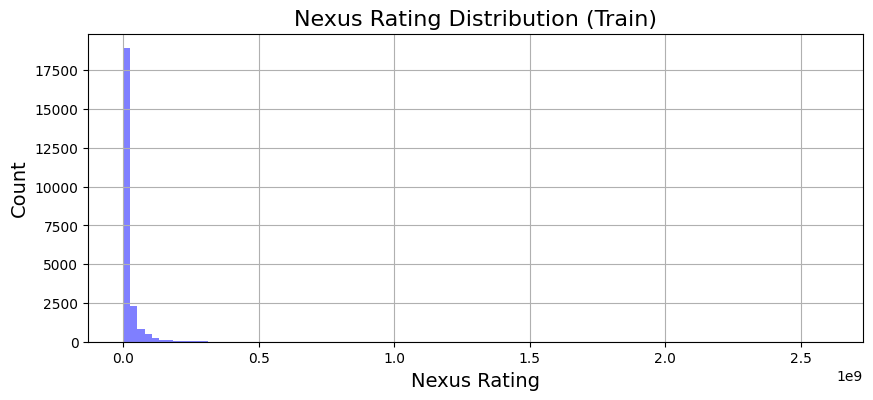

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [99]:
X_train = train.drop(columns=['nexus_rating'])
y_train = train['nexus_rating']

# For the test data, since the target 'nexus_rating' isn't typically available in test sets:
X_test = test.drop(columns=['nexus_rating'], errors='ignore')
y_test = test['nexus_rating']

if 'nexus_rating' in test.columns:
    X_test = test.drop(columns=['nexus_rating'])
    y_test = test['nexus_rating']
else:
    X_test = test  # Just the features, no target available
    y_test = None

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=43),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_root_mean_squared_log_error',
                           verbose=2
                           )

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSLE:", -grid_search.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.4s
[CV] END max_depth=10, min_s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSLE: 0.3022828588824286


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSLE: 0.3022828588824286

In [264]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [265]:
import pandas as pd
import numpy as np

# Load the data from CSV
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [291]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')

# Impute both train and test datasets
train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
test_imputed = pd.DataFrame(imputer.transform(test), columns=test.columns)

# Calculate column-wise statistics (e.g., median) for the imputed training data
train_stats = train_imputed.apply(np.median, axis=0)
test_stats = test_imputed.apply(np.median, axis=0)

# Create a DataFrame to hold column similarities
similarities = pd.DataFrame(index=test_imputed.columns, columns=train_imputed.columns)

# Calculate absolute differences in median values to assess similarity
for test_col in test_imputed.columns:
    for train_col in train_imputed.columns:
        similarities.loc[test_col, train_col] = abs(train_stats[train_col] - test_stats[test_col])

# Initialize mappings
column_mapping = {}
used_train_cols = set()
used_test_cols = set()

# Function to find the best available training column for a given test column
def find_best_match(test_col):
    available_train_cols = [col for col in train_imputed.columns if col not in used_train_cols]
    if not available_train_cols:
        return None
    best_match = None
    best_similarity = np.inf
    for train_col in available_train_cols:
        similarity = similarities.loc[test_col, train_col]
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = train_col
    return best_match

# Iterate over each test column to find the best match
for test_col in test_imputed.columns:
    if test_col in used_test_cols:
        continue
    best_train_col = find_best_match(test_col)
    if best_train_col is not None:
        column_mapping[test_col] = best_train_col
        used_train_cols.add(best_train_col)
        used_test_cols.add(test_col)
        print(f"Mapping test column '{test_col}' to train column '{best_train_col}'")
    else:
        print(f"Warning: No available training column found for test column '{test_col}'")

# Rename the columns in the test data
test_reordered = test.rename(columns=column_mapping)

# Ensure all training columns are present in the reordered test data
for train_col in train_imputed.columns:
    if train_col not in test_reordered.columns:
        print(f"Warning: Column '{train_col}' is missing from the reordered test data.")
        test_reordered[train_col] = np.nan

# Reorder the columns to match the training data
test_reordered = test_reordered[train_imputed.columns]

def swap_headers(df, col1, col2):
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Both column names must be present in the DataFrame.")
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_swapped = df.copy()
    
    # Swap the columns
    df_swapped.columns = [col2 if col == col1 else col1 if col == col2 else col for col in df.columns]
    
    print(f"    Swapped columns '{col1}' and '{col2}'")
    return df_swapped

print("Manual swaps:")
test_reordered = swap_headers(test_reordered, 'external_collectors', 'ambient_harvesters')
test_reordered = swap_headers(test_reordered, 'upper_collector_height', 'energy_flow_design')
test_reordered = swap_headers(test_reordered, 'shielded_harvesters', 'external_collectors')

# Save the reordered test data to a new CSV file
test_reordered.to_csv('final_mission_test_reordered.csv', index=False)

print("Data manipulation complete. Reordered test data saved to 'final_mission_test_reordered.csv'.")

Mapping test column 'ownership_type' to train column 'ownership_type'
Mapping test column 'nexus_rating' to train column 'energy_footprint'
Mapping test column 'energy_footprint' to train column 'core_reactor_size'
Mapping test column 'core_reactor_size' to train column 'harvesting_space'
Mapping test column 'harvesting_space' to train column 'vertical_alignment'
Mapping test column 'vertical_alignment' to train column 'power_chambers'
Mapping test column 'power_chambers' to train column 'upper_collector_height'
Mapping test column 'energy_flow_design' to train column 'energy_flow_design'
Mapping test column 'upper_collector_height' to train column 'shared_conversion_units'
Mapping test column 'shared_conversion_units' to train column 'isolated_conversion_units'
Mapping test column 'isolated_conversion_units' to train column 'internal_collectors'
Mapping test column 'internal_collectors' to train column 'shielded_harvesters'
Mapping test column 'external_collectors' to train column 'ex

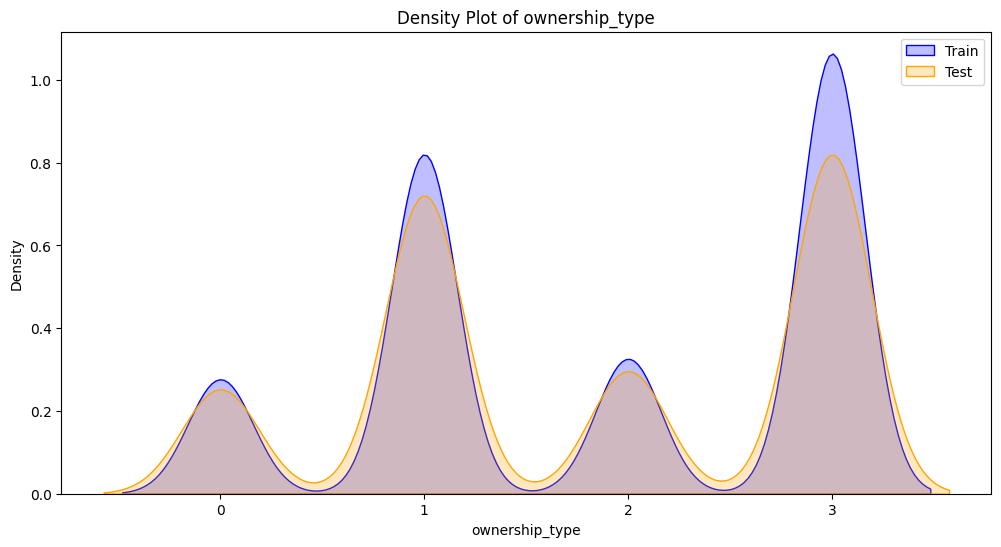

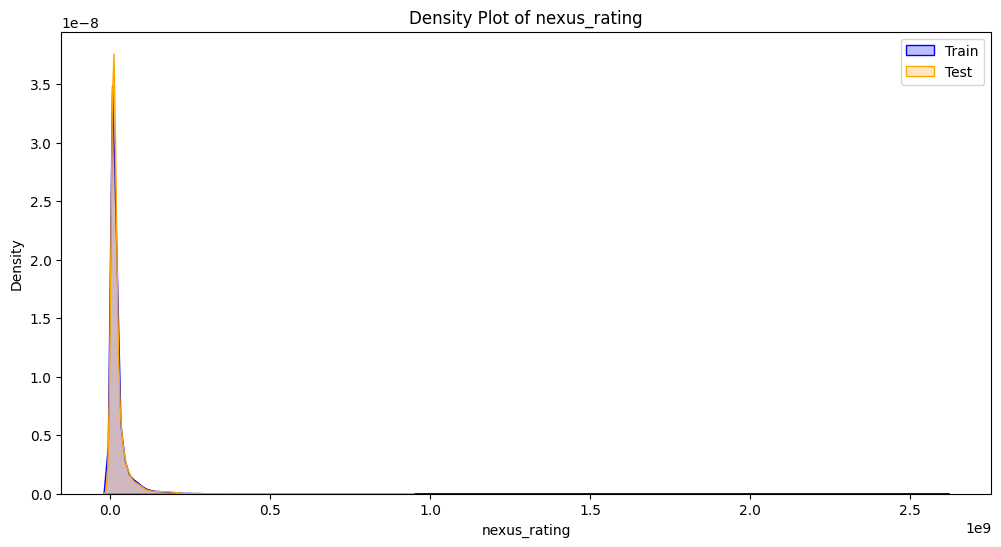

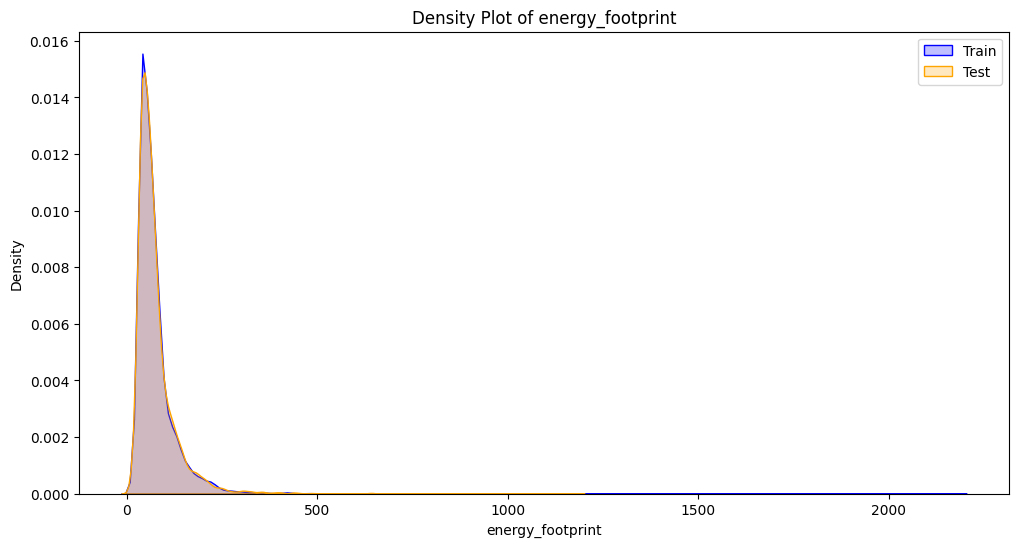

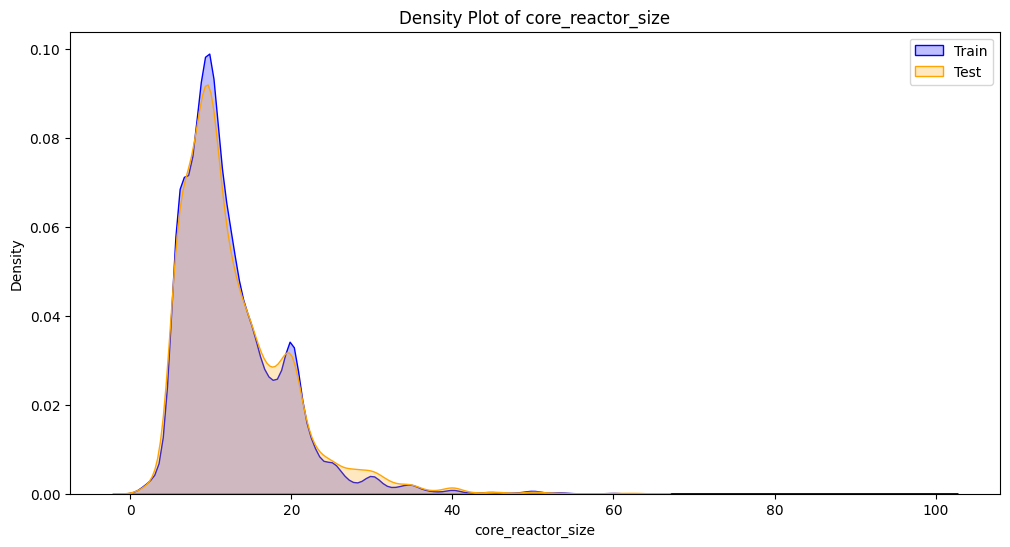

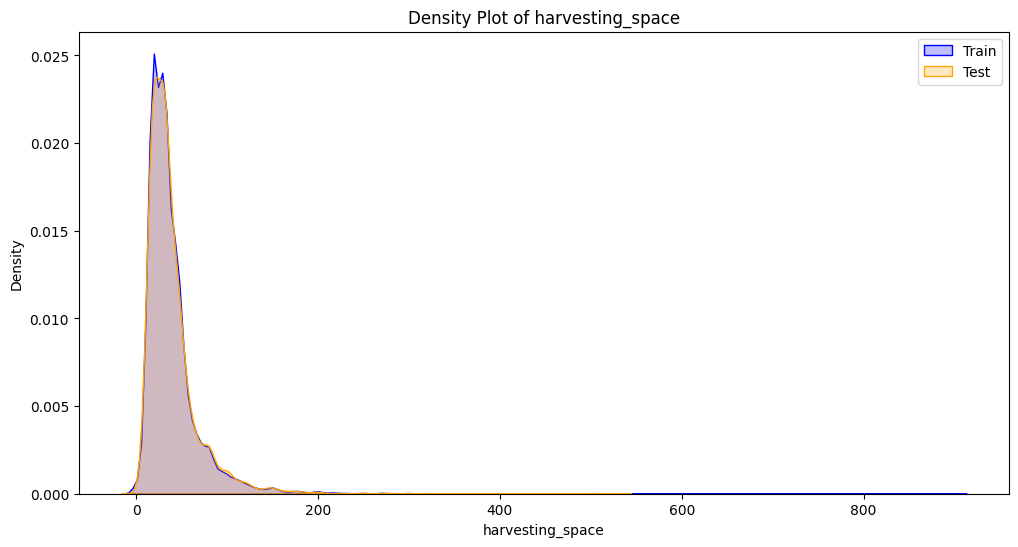

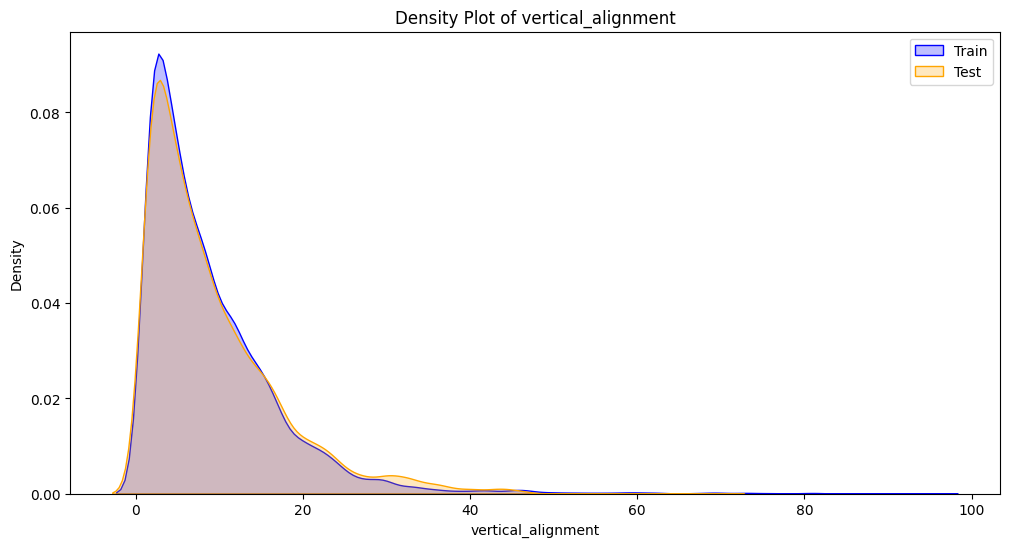

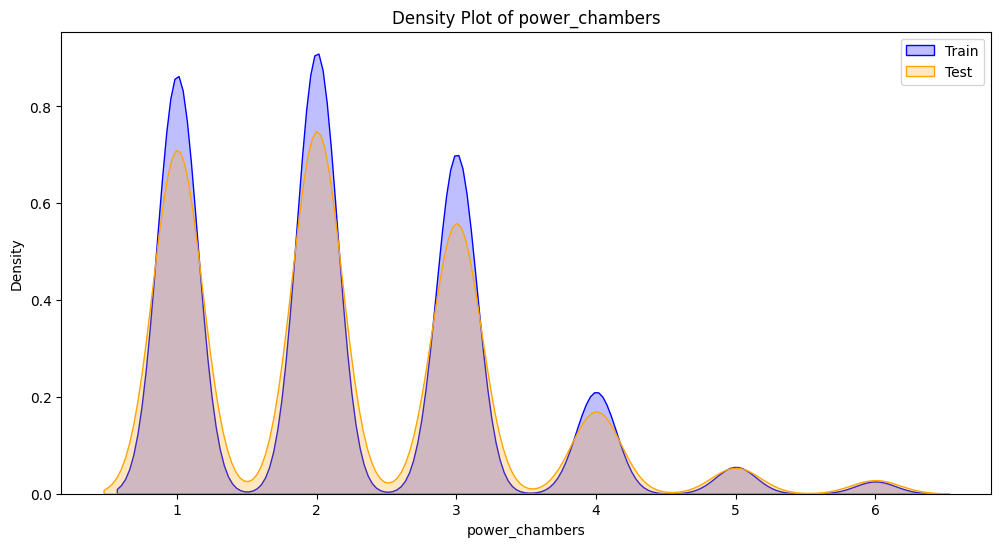

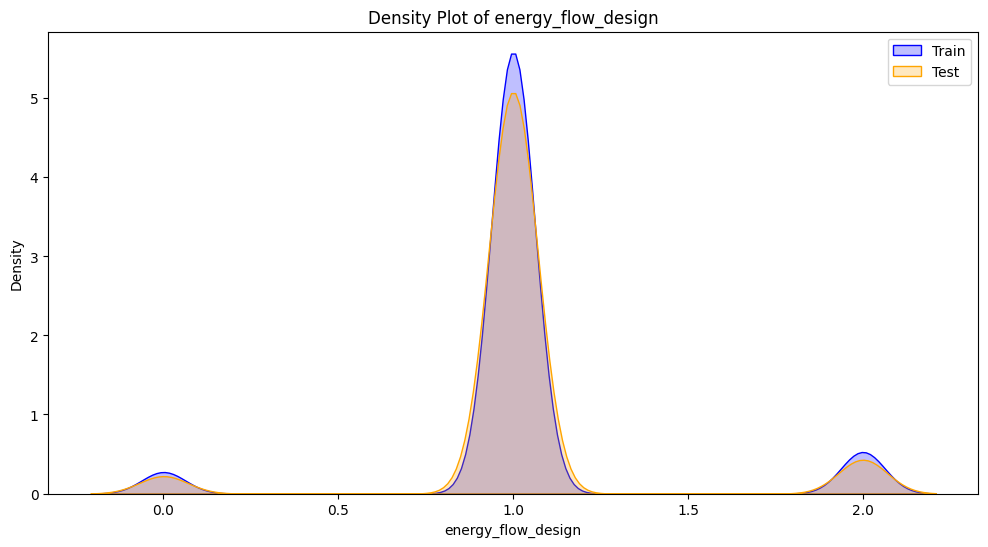

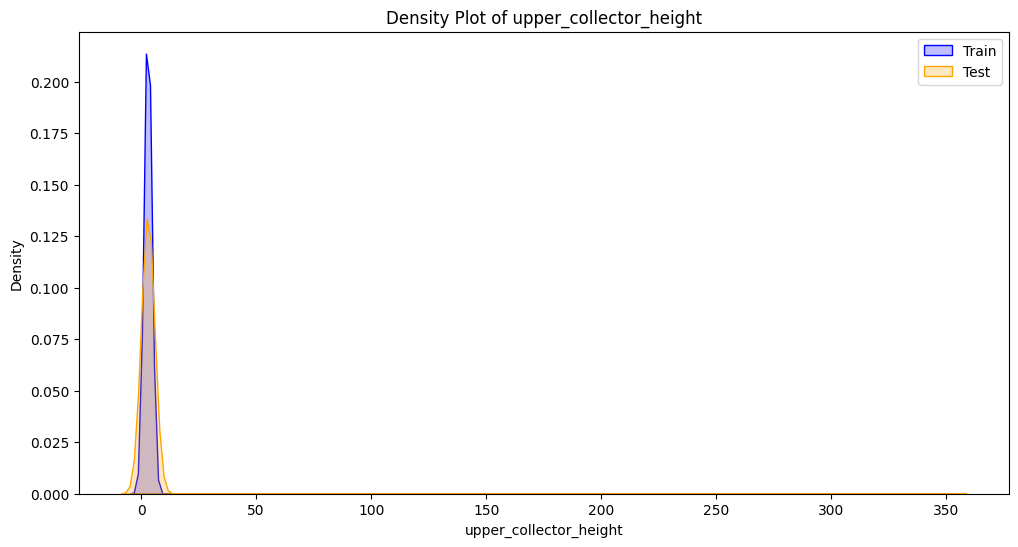

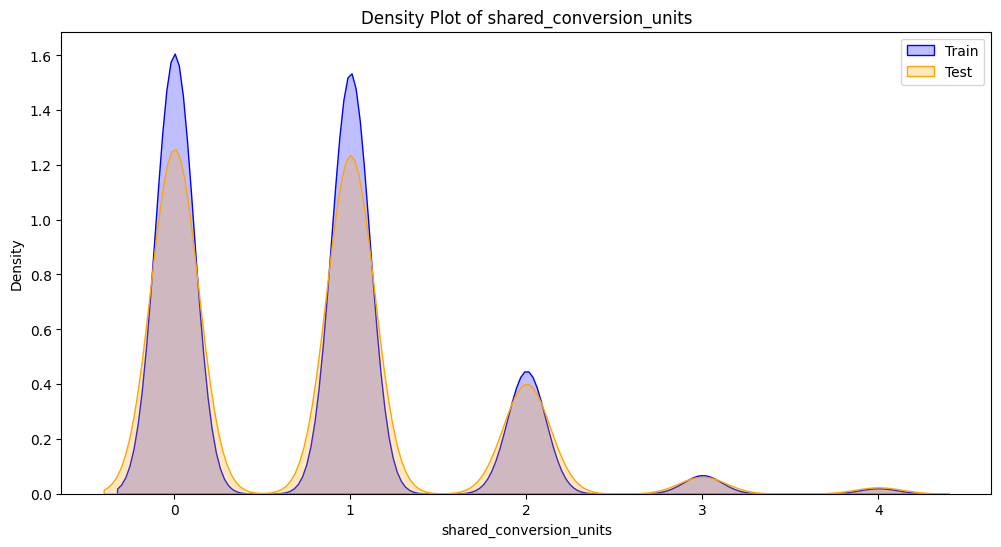

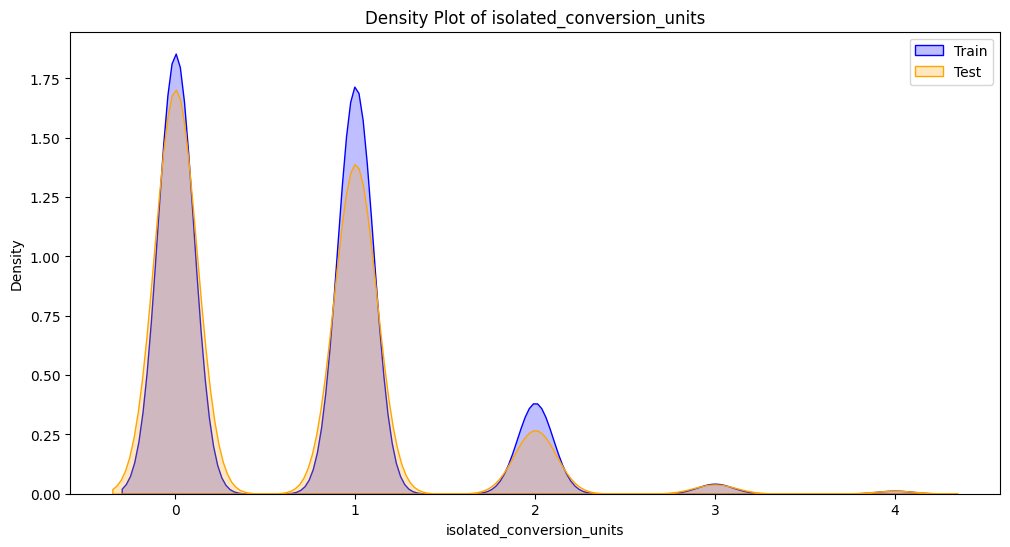

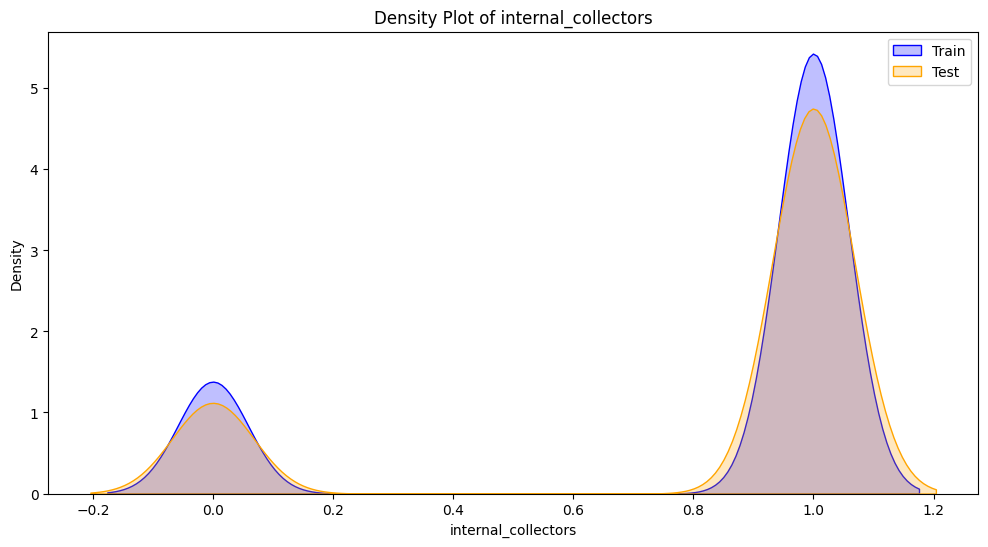

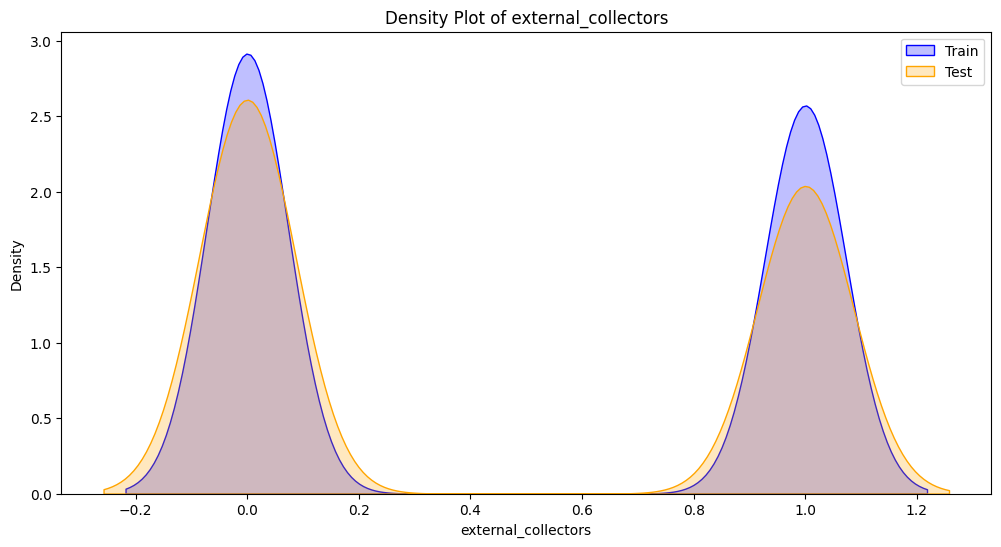

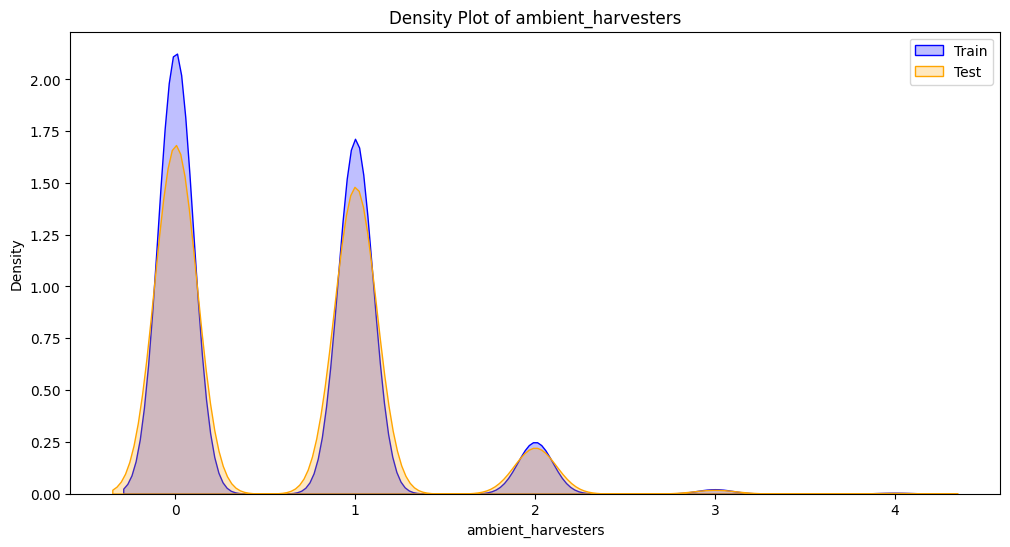

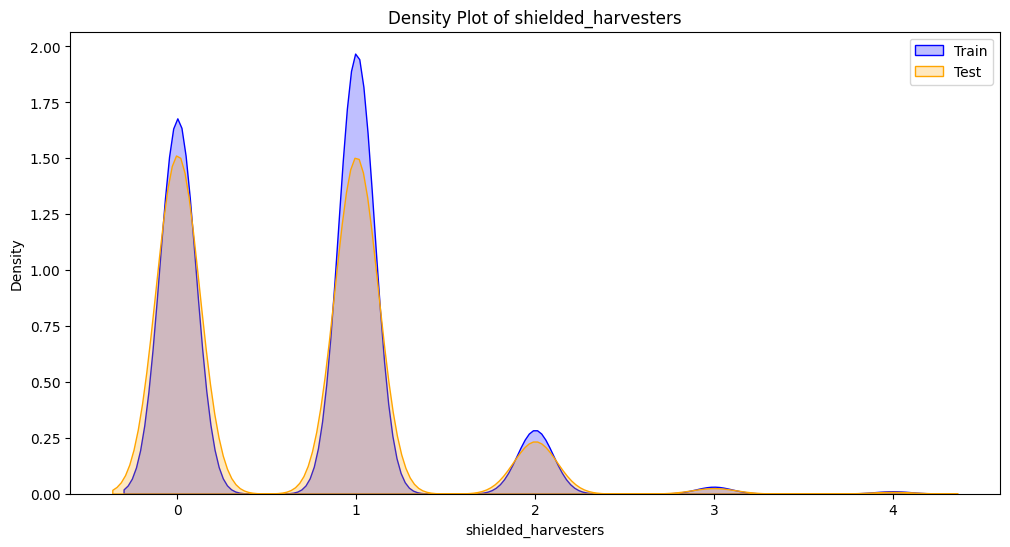

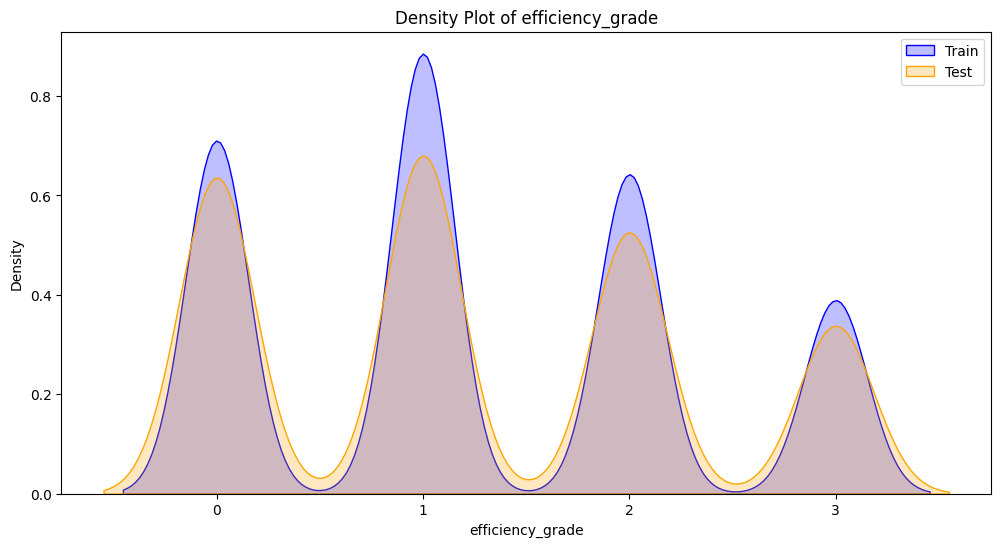

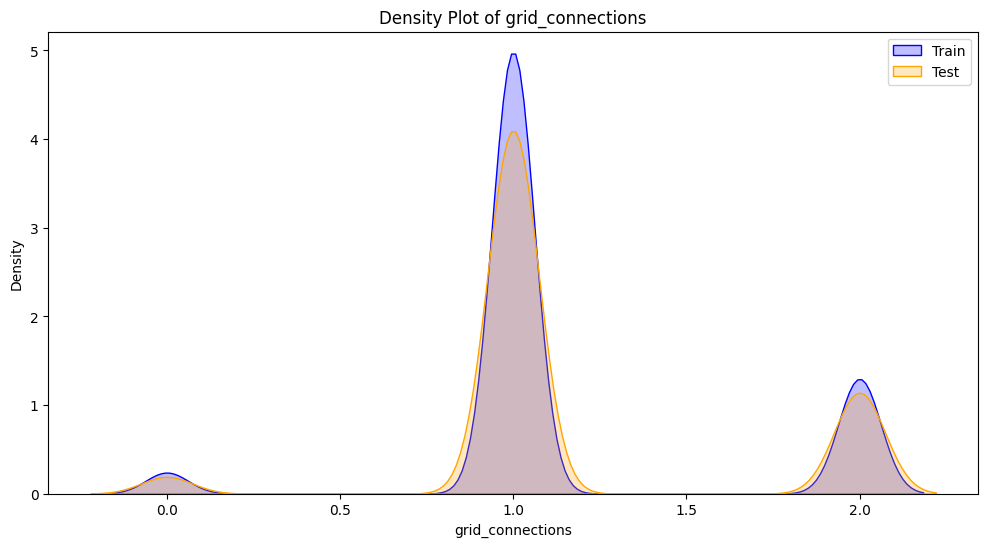

In [292]:
# Plot reordered against train

import seaborn as sns

# Plot density plots for each column in train and test datasets
def plot_density_plots(train_df, test_df, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        sns.kdeplot(train_df[col].dropna(), label='Train', color='blue', fill=True)
        sns.kdeplot(test_df[col].dropna(), label='Test', color='orange', fill=True)
        plt.title(f'Density Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# List of columns to compare (excluding 'nexus_rating' if it's the target)
columns_to_compare = [col for col in train.columns if col in test.columns]

# Plot histograms for the specified columns
plot_density_plots(train, test_reordered, columns_to_compare)


In [299]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='mean')

# Align test columns to match train columns
test_aligned = test_reordered.reindex(columns=train.columns, fill_value=np.nan)

# Impute missing values
train_imputed = imputer.fit_transform(train)
test_imputed = imputer.transform(test_aligned)

# Convert imputed arrays back to DataFrames
train_imputed_df = pd.DataFrame(train_imputed, columns=train.columns)
test_imputed_df = pd.DataFrame(test_imputed, columns=test_aligned.columns)

# Separate features and target variables
X_train_imputed = train_imputed_df.drop(columns=['nexus_rating'])
y_train_imputed  = train_imputed_df['nexus_rating']

X_test_imputed  = test_imputed_df.drop(columns=['nexus_rating'])
y_test_imputed  = test_imputed_df['nexus_rating']

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()

# Fit and transform the training data, and transform the test data
X_train = scaler_X.fit_transform(X_train_imputed)
X_test = scaler_X.transform(X_test_imputed)

# Initialize MinMaxScaler for the target variable
scaler_y = MinMaxScaler()

y_train_reshaped = y_train_imputed.values.reshape(-1, 1)
y_test_reshaped = y_test_imputed.values.reshape(-1, 1)

# Fit and transform the training target variable, and transform the test target variable
y_train = scaler_y.fit_transform(y_train_reshaped).ravel()
y_test = scaler_y.transform(y_test_reshaped).ravel()

In [300]:
# 1. Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor, ExtraTreesRegressor

# 4. Initialize individual models
rfr = RandomForestRegressor(
    n_estimators=500,        # More trees to improve performance, at the cost of computation time
    max_depth=20,            # Deeper trees may lead to overfitting; balance depth with other parameters
    min_samples_split=10,    # More samples required to split nodes to reduce overfitting
    min_samples_leaf=2,      # Increase minimum samples in leaves for better generalization
    max_features='sqrt',     # Use a subset of features at each split to reduce overfitting
    random_state=42,
    n_jobs=-1                # Use all available cores for faster computation
)

abr = AdaBoostRegressor(
    n_estimators=500,        # Increase the number of estimators for better performance
    learning_rate=0.01,       # Lower learning rate allows the model to learn more gradually
    loss='square',           # Use 'square' loss for more robust error handling (less sensitive to outliers)
    random_state=42
)

# 5. Ensemble model using StackingRegressor
estimators = [
    ('rfr', rfr),
    ('abr', abr)
]

# Use GradientBoosting as the final meta-model
stacking_regressor = StackingRegressor(
    estimators=estimators, 
    final_estimator=GradientBoostingRegressor(),
    cv=5,
    n_jobs=-1
    )

# 6. Train the individual models and stacking ensemble
print("Fitting models...")
rfr.fit(X_train, y_train)
print("     1 - Finished fitting rfr.")
abr.fit(X_train, y_train)
print("     2 - Finished fitting abr.")
stacking_regressor.fit(X_train, y_train)
print("     3 - Finished fitting stacked.")

# 7. Predictions from individual models and the stacking ensemble
y_pred_rfr = rfr.predict(X_test)
y_pred_abr = abr.predict(X_test)
y_pred_stack = stacking_regressor.predict(X_test)

# 8. Calculate RMSLE for individual models and the ensemble (no need to inverse transform since y_train was scaled)
rmsle_rfr = rmsle(y_test, y_pred_rfr)
rmsle_abr = rmsle(y_test, y_pred_abr)
rmsle_stack = rmsle(y_test, y_pred_stack)

print(f'RMSLE RandomForestRegressor: {rmsle_rfr}')
print(f'RMSLE AdaBoostRegressor: {rmsle_abr}')

y_pred_ensemble = (y_pred_rfr + y_pred_abr) / 2
rmsle_ensemble = rmsle(y_test, y_pred_ensemble)
print(f'RMSLE Ensemble Model (Average): {rmsle_ensemble}')

# Final emsemble stacking model
print(f'RMSLE Stacking Ensemble Model: {rmsle_stack}')


Fitting models...
     1 - Finished fitting rfr.
     2 - Finished fitting abr.
     3 - Finished fitting stacked.
RMSLE RandomForestRegressor: 0.00859219093510508
RMSLE AdaBoostRegressor: 0.011256443302614914
RMSLE Ensemble Model (Average): 0.009537083318573308
RMSLE Stacking Ensemble Model: 0.009173400664249187


RMSLE RandomForestRegressor: 0.32949763130992693
RMSLE AdaBoostRegressor: 0.5510527419853204
RMSLE Ensemble Model (Average): 0.4067531907758463
RMSLE Stacking Ensemble Model: 0.3327271503040522

In [109]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
